In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
from xspec import *

In [3]:
s = Spectrum("src_spectrum_bin10.ds")


1 spectrum  in use
 
Spectral Data File: src_spectrum_bin10.ds  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -6.363e-04 +/- 2.053e-03 (-4.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 4616 sec
 Using fit statistic: chi
 Using Background File                bkg_spectrum_grp.ds
  Background Exposure Time: 4616 sec
 Using Response (RMF) File            response_grp.rmf for Source 1



In [4]:
# Model("phabs*apec")
# Fit.perform()
# Plot.device = "/xs"
# Plot("data")

In [5]:
Plot.device = '/null'
Plot('data')

In [6]:
# # s.ignore('bad')
# Plot.xAxis='angstrom'
# s.ignore('5.0-60.0')
# Plot.perHz=False
# Plot.area=True
# Plot('data')
# wave = Plot.x()
# rates = Plot.y()
# bins = Plot.xErr()
# error = Plot.yErr()
# folded = Plot.model()

In [7]:
# plt.errorbar(wave, rates, xerr=bins, yerr=error, ls='none')


In [8]:
# mod = Model('apec*phabs', setPars={1:1, 2:0.4, 5:1e-3})
# mod.phabs.nH.frozen = True

In [9]:
# Fit.perform()

In [6]:
# s.ignore('bad')
Plot.xAxis='angstrom'
# s.ignore('**-5.0 60.0-**')

mod = Model('phabs*(apec)', setPars={1:1e-3, 2:1.0,3:0.4})
mod.phabs.nH.frozen = True
# mod.apec.Abundanc.frozen = False
# mod.apec_3.Abundanc.frozen = False


Fit.perform()


# Plot.setRebin(minSig=3, maxBins=10, groupNum=1, errType='quad')

Plot.perHz=False
Plot.area=True
Plot('data')

wave = Plot.x()
rates = Plot.y()
bins = Plot.xErr()
error = Plot.yErr()
folded = Plot.model()


Model phabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.835983e+10     using 7 bins.

Test statistic : Chi-Squared              4.835983e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              8.163950e+11     using 7 bins.

Test statistic : Chi-Squared              8.163950e+11     using 7 bins.
 Null hypothesis probability of

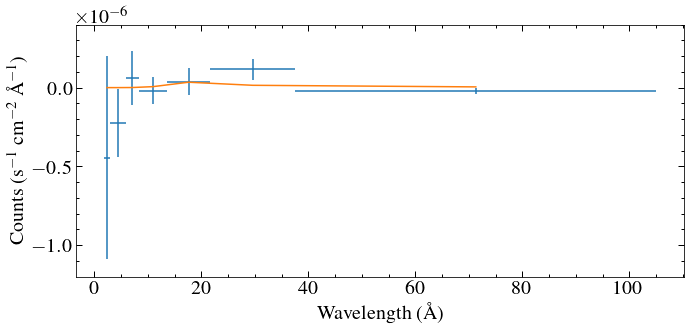

In [7]:
plt.figure(figsize=(10, 5))
plt.errorbar(wave, rates, xerr=bins, yerr=error, ls='none')
# plt.step(wave, rates, where='mid')
plt.plot(wave, folded)
# plt.axhline(0, c='C1', ls='--')
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Counts (s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.ylim(-1.2e-6, 0.4e-6)
plt.tight_layout()

In [12]:
# s.ignore('bad')
Plot.xAxis='angstrom'
s.ignore('**-5.0 60.0-**')

mod = Model('phabs*(apec+apec)', setPars={1:1e-3, 2:0.5,3:0.4,6:2.0, 7:0.4})
# mod.phabs.nH.frozen = True
# mod.apec.Abundanc.frozen = False
# mod.apec_3.Abundanc.frozen = False

AllModels.setEnergies("0.3 10")
Fit.perform()
flux = AllModels.calcFlux(".3 10 err")
print(flux)


# Plot.setRebin(minSig=3, maxBins=10, groupNum=1, errType='quad')

Plot.perHz=False
Plot.area=True
Plot('data')

wave = Plot.x()
rates = Plot.y()
bins = Plot.xErr()
error = Plot.yErr()
folded = Plot.model()
plt.errorbar(wave, rates, xerr=bins, yerr=error, ls='none')
# plt.step(wave, rates, where='mid')
plt.plot(wave, folded)

flux = AllModels.calcFlux(".3 10 err")
print(flux)

     2 channels (6-7) ignored in spectrum #     1
     1 channels (1) ignored in spectrum #     1

Fit statistic  : Chi-Squared              7.721615e+11     using 4 bins.

Test statistic : Chi-Squared              7.721615e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift    

***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

In [ ]:
flux = AllModels.calcFlux(".3 10 err")
print(flux)

In [ ]:
s.flux

In [ ]:
fx, fxel, fxeu = s.flux[0]*u.erg/u.cm**2/u.s, (s.flux[0]-s.flux[1])*u.erg/u.cm**2/u.s, (s.flux[2]-s.flux[0])*u.erg/u.cm**2/u.s  
d = (1000/23.39160255904337)*u.pc
p = 0.56*u.d
lstar = (10**-2.5)*u.Lsun
lx = (fx*(d.to(u.cm))**2).to(u.Lsun)
lx_star = lx/lstar
print(lx_star)
lx_star_err =  np.array(lx_star*[fxel/fx, fxeu/fx])
print(lx_star_err)

In [ ]:
path = '/media/david/2tb_ext_hd/hddata/carmenes_binary/xraycat/'
xraycat = fits.open('{}J_ApJ_743_48_catalog.dat.fits'.format(path))

In [ ]:
xraydata = xraycat[1].data
plt.figure(figsize=(7, 5))
plt.scatter(xraydata['Prot'], 10**xraydata['Lx/bol'], marker='o', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
porb = 0.60417356
porb_e = 0.00000025
# plt.errorbar(porb, lx_strar, yerr=[[lx_r_e[0]], [lx_r_e[1]]], marker='o', ls='none', c='C1', markeredgecolor='k')
plt.errorbar(p, lx_star, yerr= [[lx_star_err[0]],[lx_star_err[1]]], marker='o', c='C1', markeredgecolor='k')
plt.xlabel('Porb (d)')
plt.ylabel('R$_{\mathrm{x}}$')
plt.tight_layout()
# plt.savefig('plots/Rx.png', dpi=150, facecolor='w')
# plt.savefig('plots/Rx.pdf', dpi=150, facecolor='w')

To do- double check spectral type, lightcurve.

In [ ]:
plt.figure(figsize=(12, 6))
plt.errorbar(wave, rates, xerr=bins, yerr=error, ls='none')
# plt.step(wave, rates, where='mid')
plt.plot(wave, folded)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Counts (s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
# plt.savefig('../plots/eggr-38_xmm_spec.png', facecolor='w')

In [ ]:
# #quick sed
# wc, fc, ec, dq = np.loadtxt('../../hst_spectra/eggr_38_COS_FUV_1291_2018-02-27.dat', unpack=True)

# #uv
# plt.plot(wc[(dq==0) & (fc > 0)], fc[(dq==0) & (fc > 0)])

# #xray
# mx  = folded * (u.photon/u.s/u.cm**2/u.AA).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wave*u.AA))
# plt.plot(wave, mx)

# #uves
# upath = '/media/david/2tb_ext_hd/hddata/pcebs/optical/eggr_38_uves/'
# uspecs = glob.glob('{}*.fits'.format(upath))
# for spec in uspecs[:2]:
#     data = fits.getdata(spec, 1)[0]
#     plt.plot(data['WAVE'][data['FLUX'] > 0], data['FLUX'][data['FLUX'] > 0]*1e-16)

# #model
# mw, mf = np.loadtxt('../../models/EGGR-38_07010.dk', skiprows=40, unpack=True)
# plt.plot(mw, mf/(np.max(mf)/np.max(fc))*0.2)

# plt.xscale('log')
# plt.yscale('log')

# #bit rubbish